In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
file = 'facebook_ads_data.csv'
data = pd.read_csv(file)

In [2]:
data.head()

,ad_date,campaign_name,total_spend,total_impressions,total_clicks,total_value,cpc,cpm,ctr,romi
0,2022-11-05,Expansion,0.00,0,0,0.00,NaN,NaN,NaN,NaN
1,2022-11-01,Expansion,0.00,0,0,0.00,NaN,NaN,NaN,NaN
2,2022-10-31,Expansion,227.45,6054,58,191.87,3.92,37.57,0.009580,0.843570
3,2022-10-30,Expansion,335.91,27562,69,472.61,4.87,12.19,0.002503,1.406954
4,2022-10-29,Expansion,714.03,33358,115,680.34,6.21,21.41,0.003447,0.952817


### 1. Plot with daily total spend in 2021

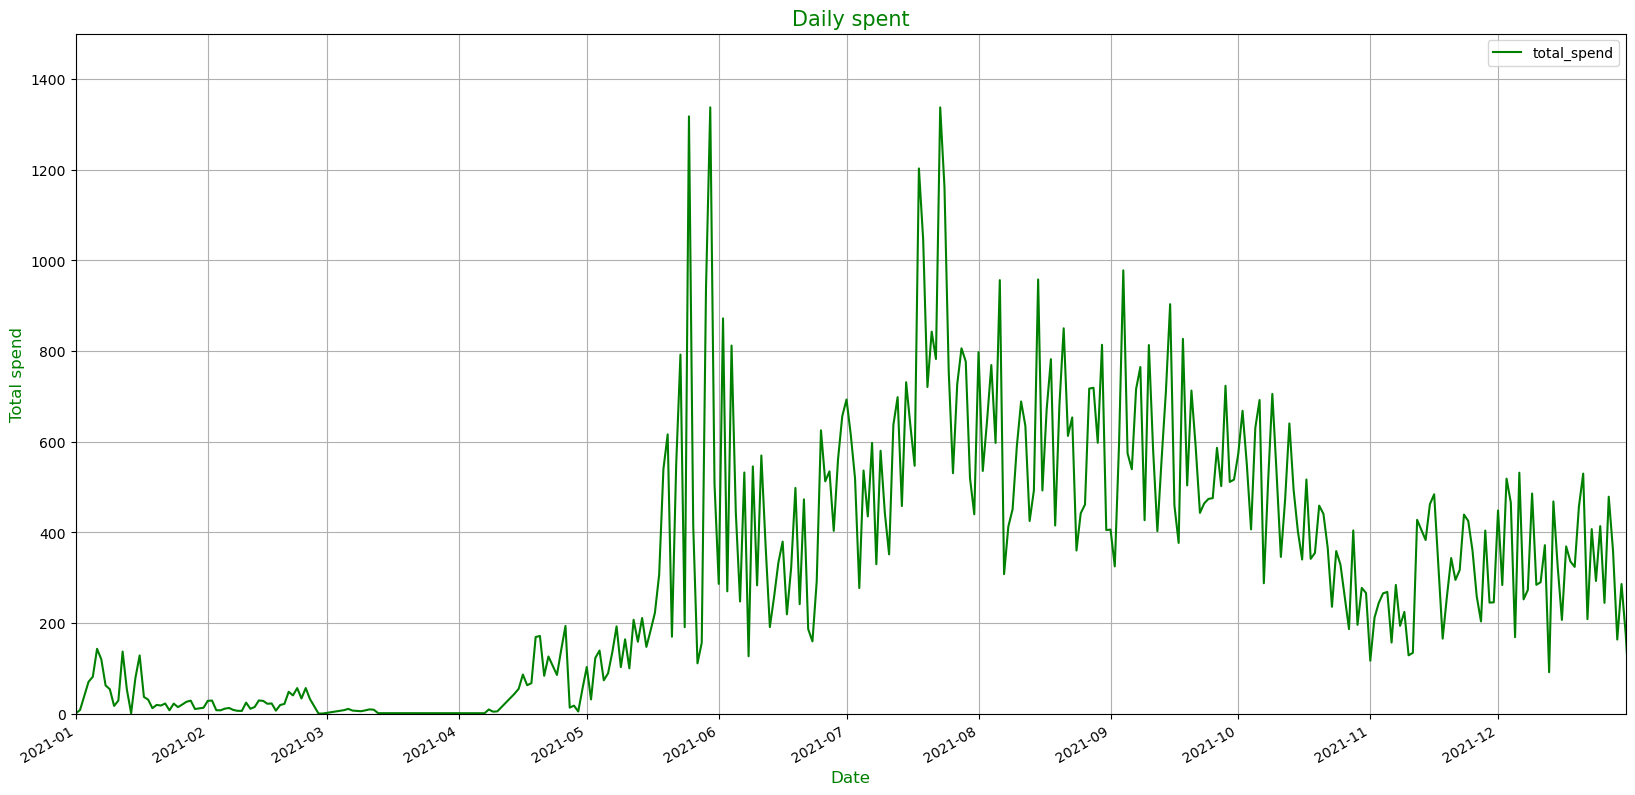

In [3]:
data['ad_date'] = pd.to_datetime(data['ad_date'])
start_date = datetime.datetime(2021, 1, 1)
end_date = datetime.datetime(2021, 12, 31)
date_grouped = data.groupby(by='ad_date')['total_spend'].sum()

plt.figure(figsize=(20,10))
date_grouped.plot(color="green")
plt.xlim(start_date, end_date)
plt.ylim(0, 1500)
plt.xlabel("Date", fontsize="large", color="green")
plt.ylabel("Total spend", fontsize="large", color="green")
plt.title("Daily spent", fontsize=15, color="green")
plt.legend()
plt.grid()
plt.show()


### 2. Plot with daily ROMI in 2021

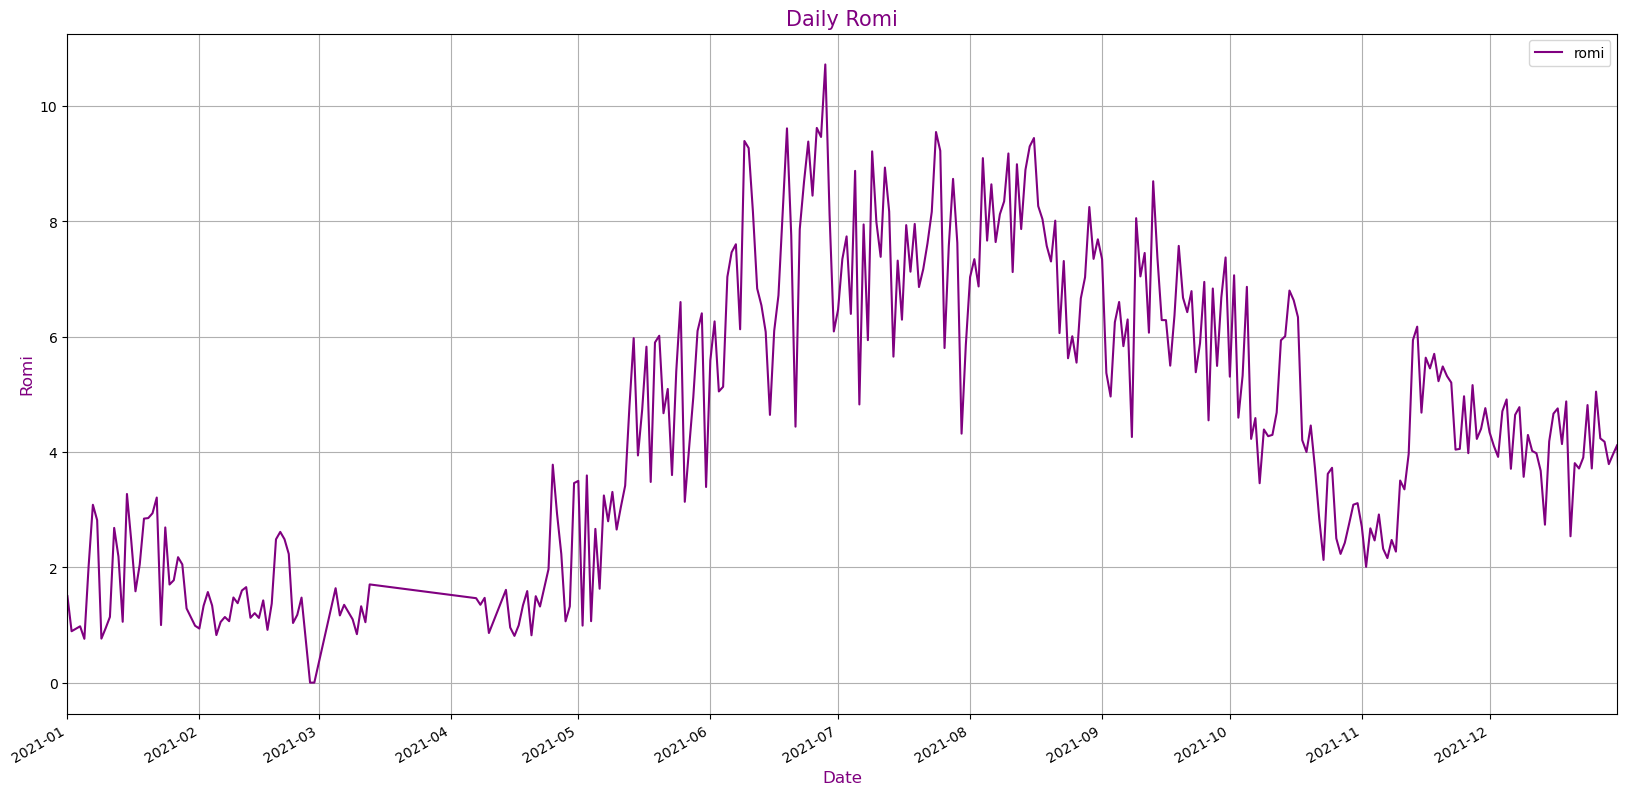

In [4]:
data['ad_date'] = pd.to_datetime(data['ad_date'])
start_date = datetime.datetime(2021, 1, 1)
end_date = datetime.datetime(2021, 12, 31)
date_grouped = data.groupby(by='ad_date')['romi'].sum()

plt.figure(figsize=(20,10))
date_grouped.plot(color="purple")
plt.xlim(start_date, end_date)
plt.xlabel("Date", fontsize="large", color="purple")
plt.ylabel("Romi", fontsize="large", color="purple")
plt.title("Daily Romi", fontsize=15, color="purple")
plt.legend()
plt.grid()
plt.show()

# BONUS

### 1. Total spend by campaign name

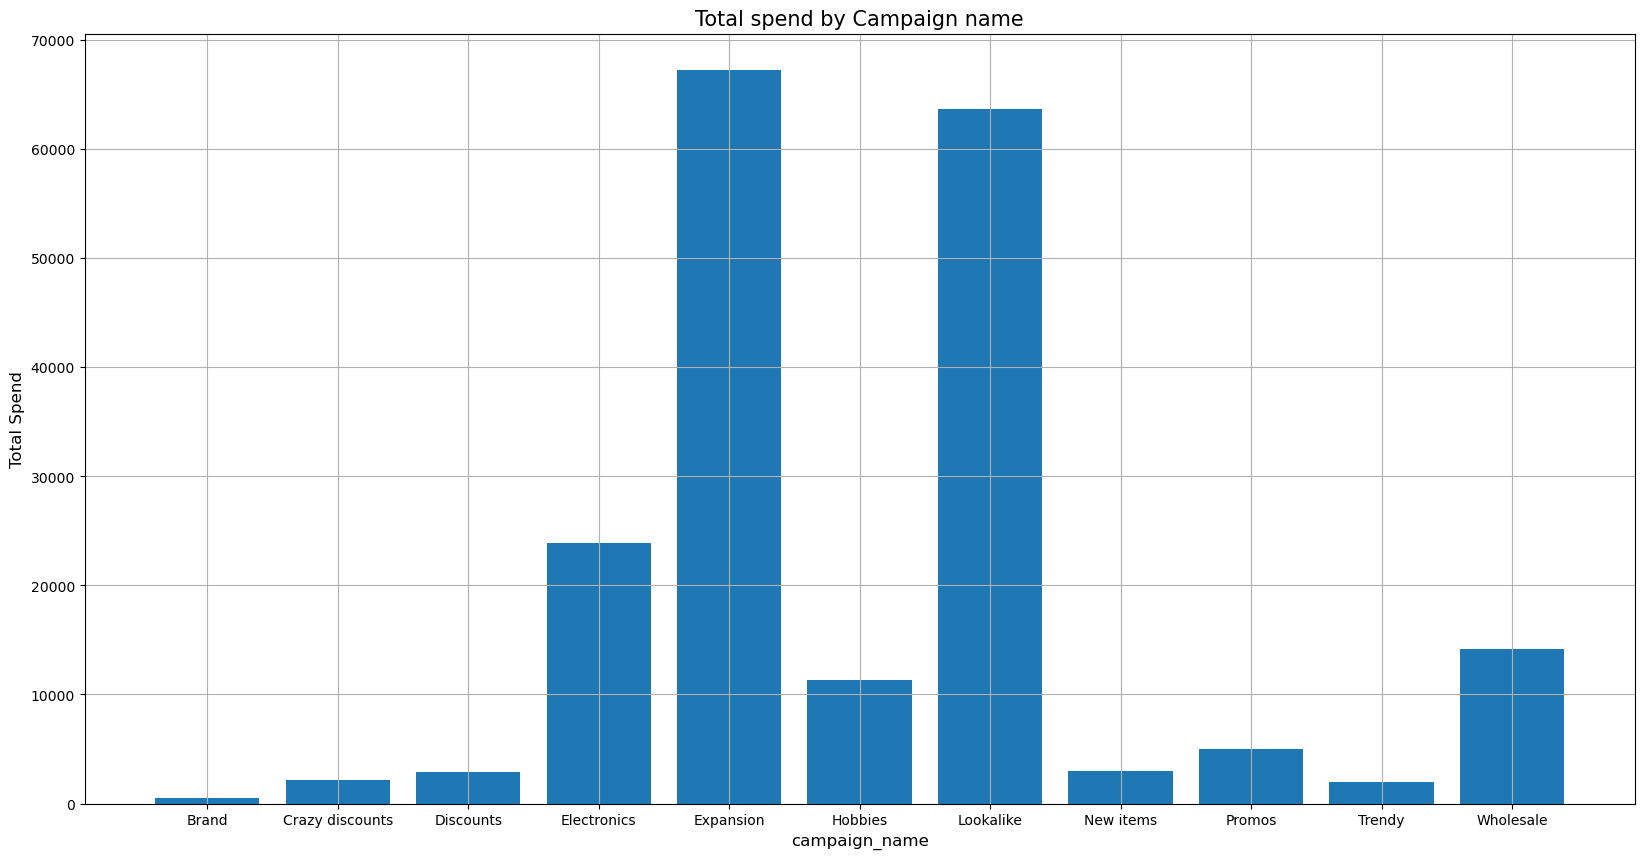

In [13]:
date_grouped = data.groupby(by='campaign_name')['total_spend'].sum().reset_index()

plt.figure(figsize=(20,10))
plt.bar(date_grouped['campaign_name'],date_grouped['total_spend']
)
plt.xlabel("campaign_name", fontsize="large")
plt.ylabel("Total Spend", fontsize="large")
plt.title("Total spend by Campaign name", fontsize=15)
plt.grid()
plt.show()

### 2. Total ROMI by campaign name

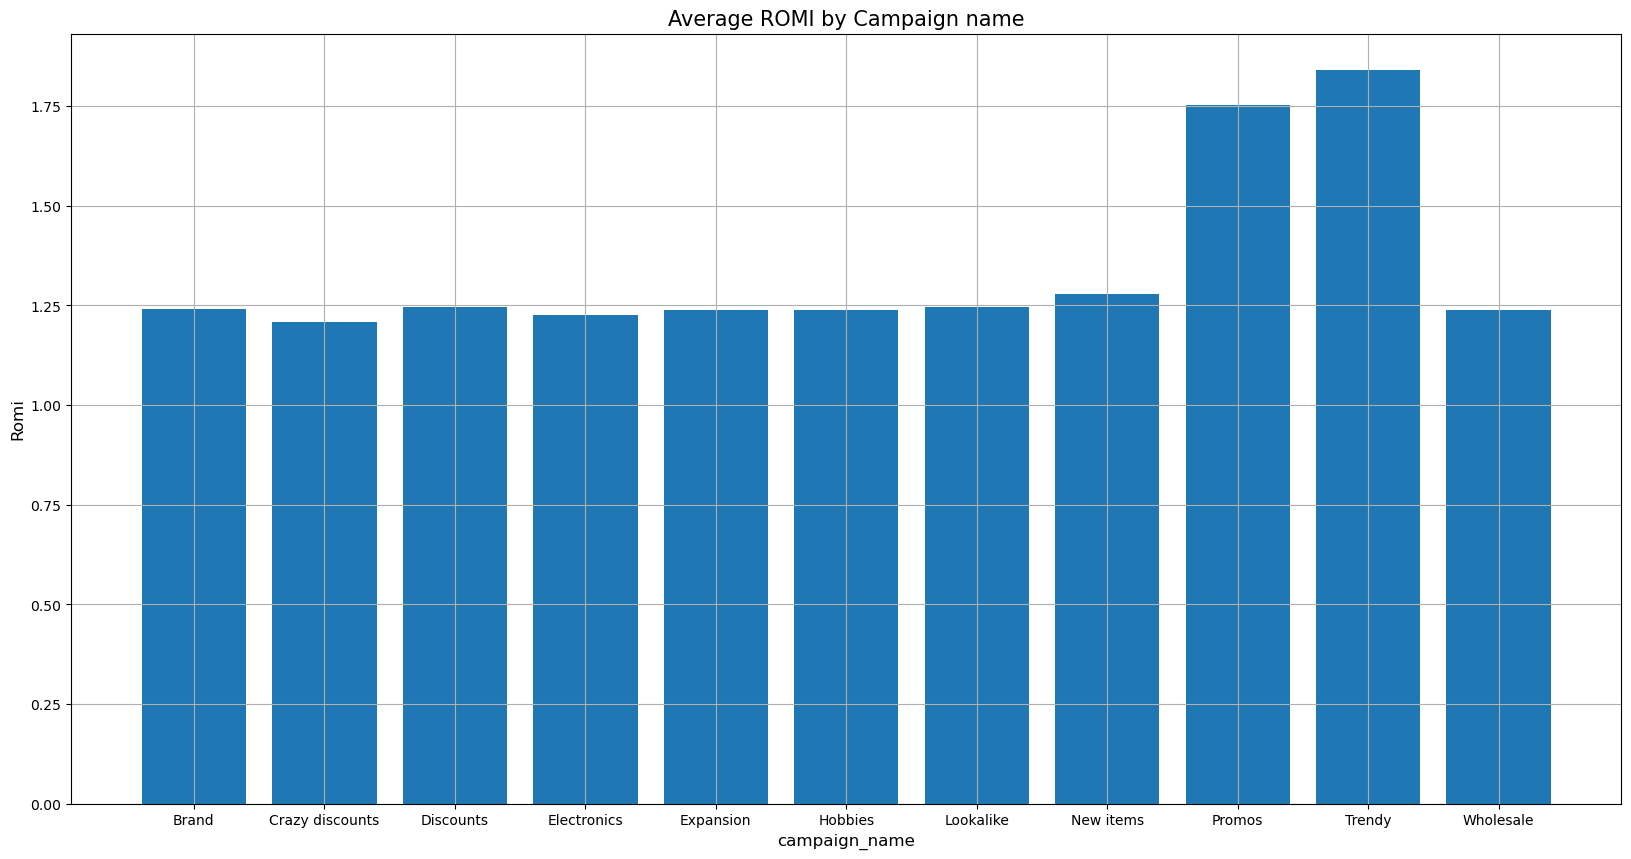

In [15]:
date_grouped = data.groupby(by='campaign_name')['romi'].mean().reset_index()

plt.figure(figsize=(20,10))
plt.bar(date_grouped['campaign_name'],date_grouped['romi']
)
plt.xlabel("campaign_name", fontsize="large")
plt.ylabel("Romi", fontsize="large")
plt.title("Average ROMI by Campaign name", fontsize=15)
plt.grid()
plt.show()

### 1. Box plot with daily ROMI grouped by campaign name

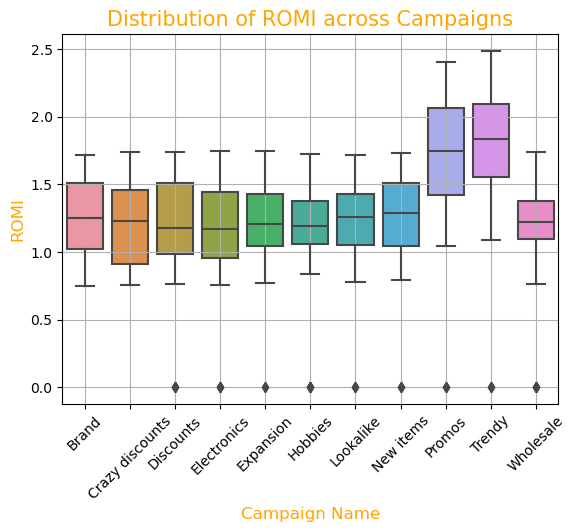

In [27]:
date_grouped = data.groupby(by=['campaign_name', 'ad_date'])['romi'].sum().reset_index()
sns.boxplot(x="campaign_name", y="romi", data=date_grouped)
plt.xlabel("Campaign Name", fontsize="large", color="orange")
plt.ylabel("ROMI", fontsize="large", color="orange")
plt.title("Distribution of ROMI across Campaigns", fontsize=15, color="orange")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid()
plt.show()

### 2. ROMI histogram

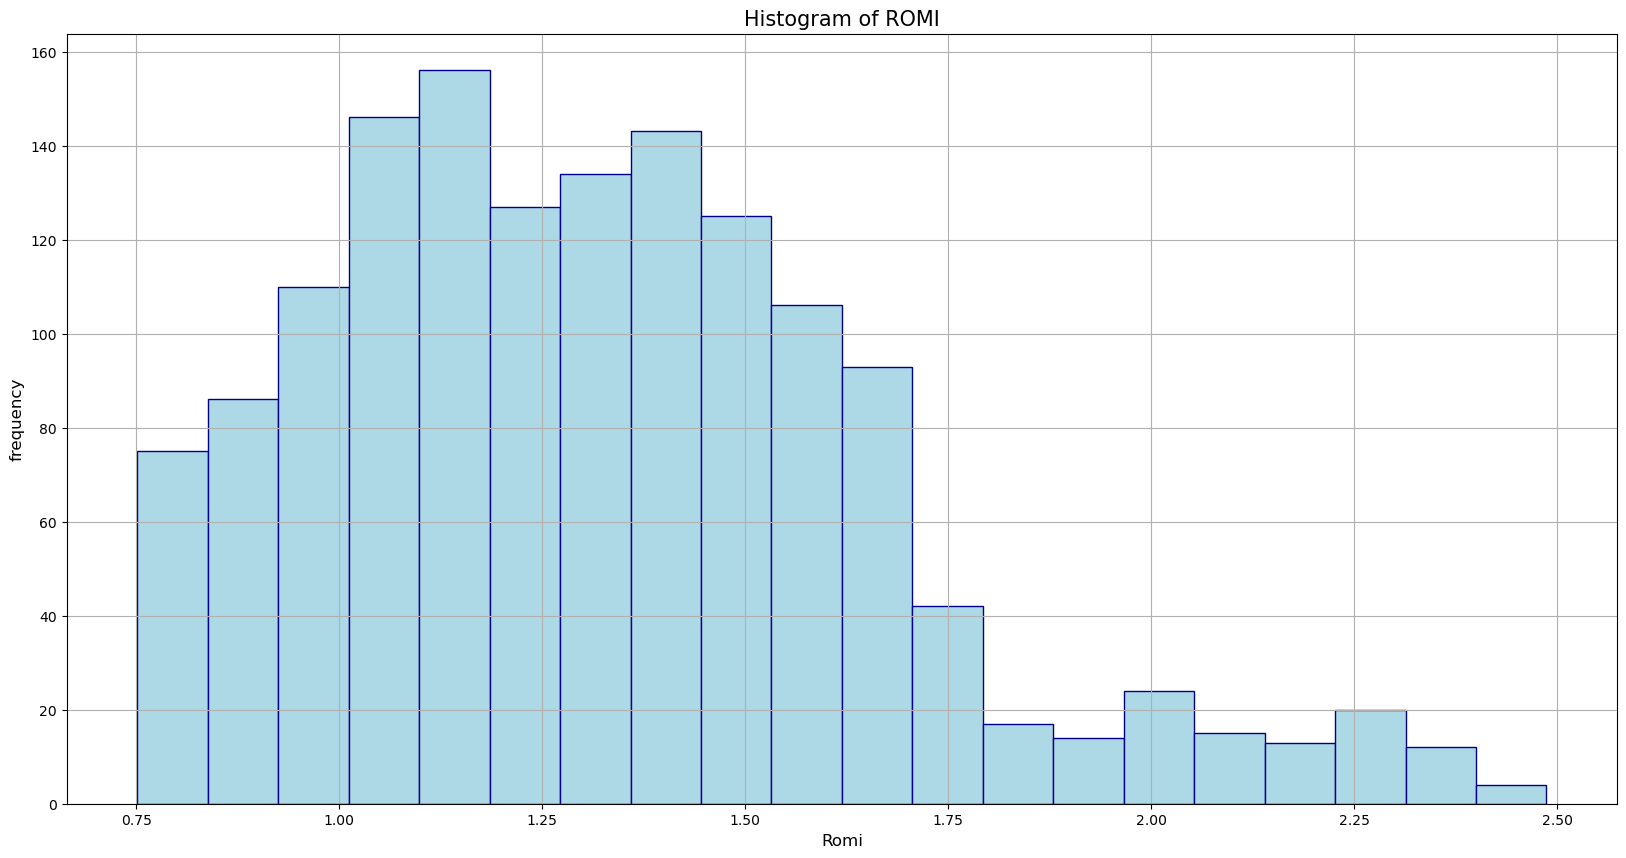

In [31]:
plt.figure(figsize=(20,10))
plt.hist(data['romi'], bins=20, color='lightblue', edgecolor='darkblue')
plt.xlabel("Romi", fontsize="large")
plt.ylabel("frequency", fontsize="large")
plt.title("Histogram of ROMI", fontsize=15)
plt.grid()
plt.show()

### 3. Heatmap with corelation of all values


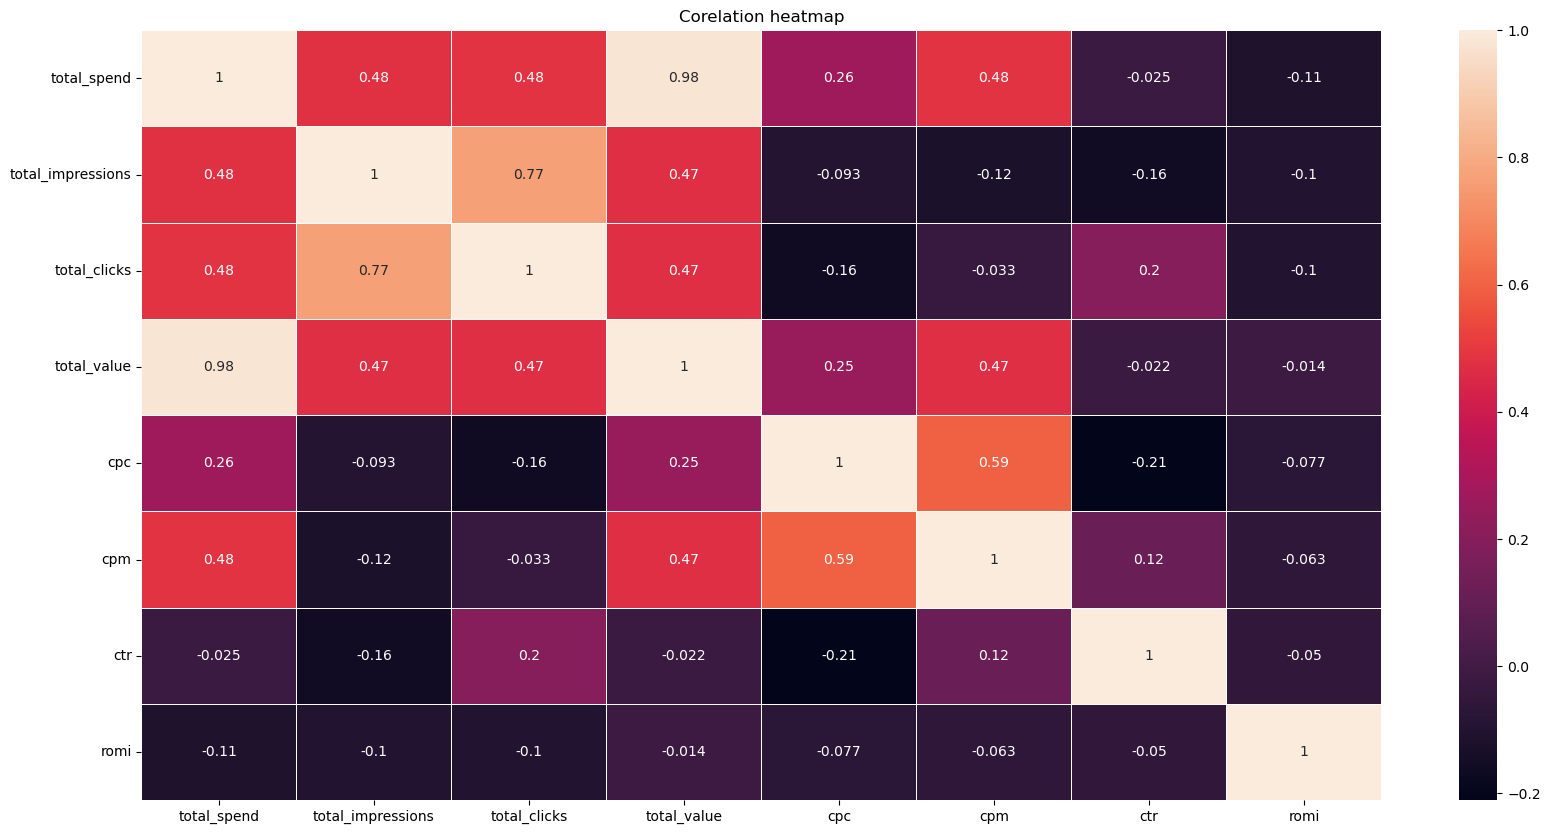

In [32]:
numeric_data = data.select_dtypes(include=['int64', 'float64'])
numeric_matrix = numeric_data.corr()

plt.figure(figsize=(20, 10))
sns.heatmap(numeric_matrix, annot=True, linewidth=.5)
plt.title('Corelation heatmap')
plt.show()

# Which values has the highest and lowest corelation? - Highest - total_Spend, total_impressions, total_clicks and total_value, lowest corelation - ROMI
# Total_value best corelation is  with total_spend

### 4. Linear Regression